In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv(r"C:\Users\TUF ASUS\Intellipat\SQL\PRT\IndianWeatherRepository.csv")

In [51]:
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [52]:
df.columns = (df.columns.str.strip()
                        .str.lower()
                        .str.replace(r'[^a-z0-9]+','_', regex=True))

In [6]:
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
num_cols = df.columns.difference(['country','location_name','region','timezone','last_updated','sunrise','sunset','moonrise','moonset','moon_phase','wind_direction','condition_text'])
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

In [7]:
df = df.dropna(subset=['country','region','location_name','last_updated'])
df = df[(df['humidity'].between(0,100, inclusive='both')) &
        (df['temperature_celsius'].between(-10,55, inclusive='both'))]

In [8]:
df['date'] = df['last_updated'].dt.date
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [9]:
df.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_gb_defra_index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,date,year,month
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45:00,27.5,81.5,...,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93,2023-08-29,2023,8
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45:00,27.5,81.5,...,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93,2023-08-29,2023,8
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45:00,26.3,79.3,...,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93,2023-08-29,2023,8
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45:00,25.6,78.1,...,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93,2023-08-29,2023,8
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45:00,27.2,81.0,...,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93,2023-08-29,2023,8


In [10]:
print("Headers:", list(df.columns))
print(df.head(5))

Headers: ['country', 'location_name', 'region', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_carbon_monoxide', 'air_quality_ozone', 'air_quality_nitrogen_dioxide', 'air_quality_sulphur_dioxide', 'air_quality_pm2_5', 'air_quality_pm10', 'air_quality_us_epa_index', 'air_quality_gb_defra_index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination', 'date', 'year', 'month']
  country location_name          region  latitude  longitude      timezone  \
0   India    Ashoknagar  Madhya Pradesh     24.57      77.72  Asia/Kolkata   
1   India        Raisen  Madhya Pradesh     23.33      77.80  Asia/Kolkata   
2   

In [48]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18055 entries, 0 to 18054
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   country                       18055 non-null  object        
 1   location_name                 18055 non-null  object        
 2   region                        18055 non-null  object        
 3   latitude                      18055 non-null  float64       
 4   longitude                     18055 non-null  float64       
 5   timezone                      18055 non-null  object        
 6   last_updated_epoch            18055 non-null  int64         
 7   last_updated                  18055 non-null  datetime64[ns]
 8   temperature_celsius           18055 non-null  float64       
 9   temperature_fahrenheit        18055 non-null  float64       
 10  condition_text                18055 non-null  object        
 11  wind_mph                    

In [12]:
daily = (df.groupby(['region','location_name','date'], as_index=False)
           .agg(temp_c=('temperature_celsius','mean'),
                hum=('humidity','mean'),
                feels_c=('feels_like_celsius','mean'),
                wind_kph=('wind_kph','mean'),
                uv=('uv_index','mean')))

In [19]:
type(daily)
daily.head()

,region,location_name,date,temp_c,hum,feels_c,wind_kph,uv
0,Andaman and Nicobar Islands,Arong,2023-08-29,27.8,80.0,31.8,36.7,6.0
1,Andaman and Nicobar Islands,Arong,2023-08-30,27.3,79.0,30.8,22.0,6.0
2,Andaman and Nicobar Islands,Arong,2023-08-31,27.9,83.0,32.4,31.7,6.0
3,Andaman and Nicobar Islands,Arong,2023-09-01,27.6,82.0,31.8,40.0,6.0
4,Andaman and Nicobar Islands,Arong,2023-09-02,27.0,83.0,30.6,33.1,6.0


In [18]:
print(daily)

                            region   location_name       date  temp_c   hum  \
0      Andaman and Nicobar Islands           Arong 2023-08-29    27.8  80.0   
1      Andaman and Nicobar Islands           Arong 2023-08-30    27.3  79.0   
2      Andaman and Nicobar Islands           Arong 2023-08-31    27.9  83.0   
3      Andaman and Nicobar Islands           Arong 2023-09-01    27.6  82.0   
4      Andaman and Nicobar Islands           Arong 2023-09-02    27.0  83.0   
...                            ...             ...        ...     ...   ...   
17924                  West Bengal  South Suburban 2023-09-26    27.0  94.0   
17925                  West Bengal  South Suburban 2023-09-27    28.0  89.0   
17926                  West Bengal  South Suburban 2023-09-28    29.0  89.0   
17927                  West Bengal  South Suburban 2023-09-29    29.0  89.0   
17928                  West Bengal  South Suburban 2023-09-30    26.0  94.0   

       feels_c  wind_kph   uv  
0         31.8     

In [20]:
monthly_city = (daily.assign(month=lambda x: x['date'].dt.month,
                             year=lambda x: x['date'].dt.year)
                      .groupby(['region','location_name','year','month'], as_index=False)
                      .agg(avg_temp=('temp_c','mean'),
                           avg_hum=('hum','mean'),
                           avg_feels=('feels_c','mean')))

In [21]:
monthly_city.head()

,region,location_name,year,month,avg_temp,avg_hum,avg_feels
0,Andaman and Nicobar Islands,Arong,2023,8,27.666667,80.666667,31.666667
1,Andaman and Nicobar Islands,Arong,2023,9,27.506667,81.233333,31.540000
2,Andhra Pradesh,Adilabad,2023,8,26.833333,71.000000,29.333333
3,Andhra Pradesh,Adilabad,2023,9,23.686667,88.500000,25.966667
4,Andhra Pradesh,Anantapur,2023,8,28.533333,57.333333,30.100000


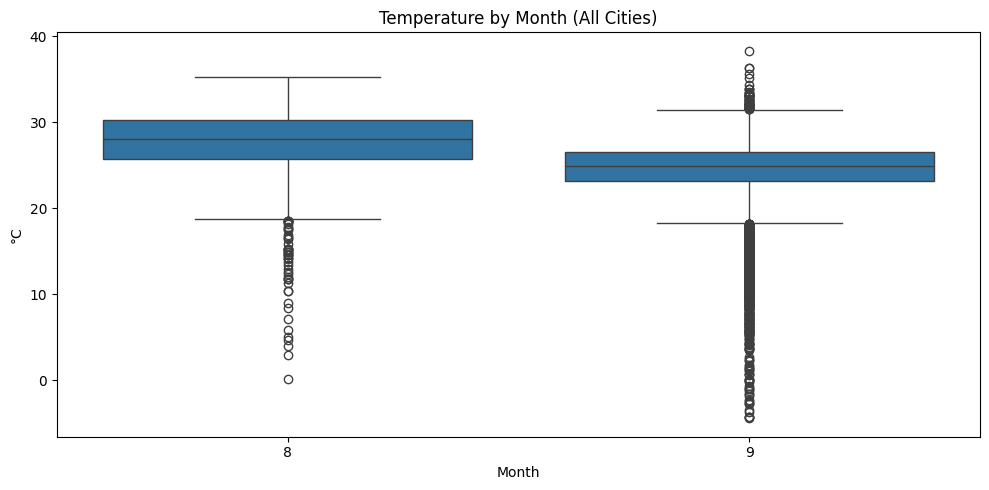

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=daily, x=daily['date'].dt.month, y='temp_c')
plt.title('Temperature by Month (All Cities)')
plt.xlabel('Month'); plt.ylabel('°C'); plt.tight_layout(); plt.show()

In [23]:
df.tail()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_gb_defra_index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,date,year,month
18050,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1696024800,2023-09-30 03:30:00,27.0,80.6,...,10,06:11 AM,06:09 PM,06:15 PM,05:48 AM,Full Moon,100,2023-09-30,2023,9
18051,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1696024800,2023-09-30 03:30:00,24.2,75.5,...,1,05:11 AM,05:10 PM,05:15 PM,04:46 AM,Full Moon,100,2023-09-30,2023,9
18052,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1696024800,2023-09-30 03:30:00,25.1,77.2,...,1,06:02 AM,06:04 PM,06:10 PM,05:44 AM,Full Moon,100,2023-09-30,2023,9
18053,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1696024800,2023-09-30 03:30:00,22.1,71.7,...,1,06:09 AM,06:13 PM,06:19 PM,05:53 AM,Full Moon,100,2023-09-30,2023,9
18054,India,Pendra,Maharashtra,21.93,74.15,Asia/Kolkata,1696024800,2023-09-30 03:30:00,24.3,75.8,...,10,06:24 AM,06:23 PM,06:30 PM,06:03 AM,Full Moon,100,2023-09-30,2023,9


In [24]:
T = df['temperature_celsius']
R = df['humidity']
df['heat_index_c'] = (-8.784695 + 1.61139411*T + 2.338549*R 
                      - 0.14611605*T*R - 0.012308094*T**2 
                      - 0.016424828*R**2 + 0.002211732*T**2*R
                      + 0.00072546*T*R**2 - 0.000003582*T**2*R**2)


In [25]:
print(df['heat_index_c'])

0        29.415278
1        29.729772
2        27.736638
3        26.849245
4        29.578595
           ...    
18050    29.196193
18051    23.214783
18052    26.102623
18053    20.133523
18054    25.474334
Name: heat_index_c, Length: 18055, dtype: float64


In [29]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.options.mode.copy_on_write = True

In [30]:
a, b = 17.27, 237.7
alpha = ((a*T)/(b+T)) + np.log((R.clip(lower=1))/100.0)  # avoid log(0)
df['dew_point_c'] = (b*alpha)/(a - alpha)

In [31]:
base = 24  # tweak per use case
df['cdd'] = (df['temperature_celsius'] - base).clip(lower=0)
df['hdd'] = (base - df['temperature_celsius']).clip(lower=0)

In [34]:
print(df[['dew_point_c','cdd','hdd']])

       dew_point_c  cdd  hdd
0        20.811780  3.5  0.0
1        21.526834  3.5  0.0
2        20.380165  2.3  0.0
3        21.045460  1.6  0.0
4        22.151028  3.2  0.0
...            ...  ...  ...
18050    21.958576  3.0  0.0
18051    24.032177  0.2  0.0
18052    18.290506  1.1  0.0
18053    20.736229  0.0  1.9
18054    15.764506  0.3  0.0

[18055 rows x 3 columns]


In [35]:
daily_feats = (df.groupby(['region','location_name','date'], as_index=False)
                 .agg(temp_c=('temperature_celsius','mean'),
                      feels_c=('feels_like_celsius','mean'),
                      hi_c=('heat_index_c','mean'),
                      dew_c=('dew_point_c','mean'),
                      hum=('humidity','mean'),
                      cdd=('cdd','sum'),
                      hdd=('hdd','sum')))
print(daily_feats.head())

                        region location_name       date  temp_c  feels_c  \
0  Andaman and Nicobar Islands         Arong 2023-08-29    27.8     31.8   
1  Andaman and Nicobar Islands         Arong 2023-08-30    27.3     30.8   
2  Andaman and Nicobar Islands         Arong 2023-08-31    27.9     32.4   
3  Andaman and Nicobar Islands         Arong 2023-09-01    27.6     31.8   
4  Andaman and Nicobar Islands         Arong 2023-09-02    27.0     30.6   

        hi_c      dew_c   hum  cdd  hdd  
0  31.604637  24.022809  80.0  3.8  0.0  
1  30.307171  23.327973  79.0  3.3  0.0  
2  32.303401  24.736178  83.0  3.9  0.0  
3  31.384272  24.240524  82.0  3.6  0.0  
4  30.027115  23.857456  83.0  3.0  0.0  


In [36]:
p90 = (daily_feats.groupby('location_name')['temp_c']
                .quantile(0.9)
                .rename('p90_temp'))
daily_feats = daily_feats.merge(p90, on='location_name', how='left')
daily_feats['is_extreme_temp'] = daily_feats['temp_c'] > daily_feats['p90_temp']

In [37]:
def run_lengths(s):
    # s: boolean series sorted by date
    return s.groupby((~s).cumsum()).cumcount()+1

In [39]:
daily_feats = (daily_feats.sort_values(['location_name','date'])
                          .assign(extreme_run=lambda d: d.groupby('location_name')['is_extreme_temp']
                                                         .apply(run_lengths)))

TypeError: incompatible index of inserted column with frame index

In [40]:
heatwaves = (daily_feats[daily_feats['heatwave']]
               .groupby(['region','location_name'], as_index=False)
               .agg(heatwave_days=('heatwave','sum')))
print("Heatwave days per city (sample):")
print(heatwaves.head())

KeyError: 'heatwave'

In [41]:
city_profile = (daily_feats.groupby(['region','location_name'], as_index=False)
                  .agg(temp_mean=('temp_c','mean'),
                       temp_std=('temp_c','std'),
                       hum_mean=('hum','mean'),
                       hi_mean=('hi_c','mean'),
                       cdd_sum=('cdd','sum'),
                       hdd_sum=('hdd','sum'))
                  .fillna(0))

In [42]:
X = city_profile[['temp_mean','temp_std','hum_mean','hi_mean','cdd_sum','hdd_sum']].values
X = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42).fit(X)
city_profile['cluster'] = kmeans.labels_

In [43]:
print(city_profile.sort_values(['cluster','region','location_name']).head(15))

                region location_name  temp_mean  temp_std   hum_mean  \
88        Chhattisgarh        Bastar  22.284848  1.396675  92.090909   
97        Chhattisgarh     Kondagaon  22.269697  1.398098  91.939394   
160   Himachal Pradesh         Mandi  18.096970  2.328557  74.969697   
161   Himachal Pradesh        Shimla  18.042424  2.045426  82.303030   
162   Himachal Pradesh         Solan  18.196970  2.060110  82.333333   
176  Jammu and Kashmir        Ramban  18.475758  1.860952  73.818182   
202          Karnataka     Bangalore  22.181818  2.068432  89.515152   
203          Karnataka       Belgaum  20.787879  1.213404  92.545455   
207          Karnataka   Chikmagalur  19.369697  1.486499  92.575758   
208          Karnataka   Chitradurga  21.475758  1.444609  86.606061   
209          Karnataka       Dharwad  21.612121  1.274450  89.575758   
212          Karnataka        Hassan  19.959375  1.276047  90.343750   
213          Karnataka        Haveri  21.648485  1.446358  91.87

In [44]:
def city_forecast(d, steps=30):
    """d: daily_feats for a single city (has date, temp_c)."""
    s = (d.set_index('date')['temp_c']
           .asfreq('D')
           .interpolate(limit_direction='both'))
    # Simple seasonal weekly model; tune orders after residual checks
    model = SARIMAX(s, order=(1,1,1), seasonal_order=(1,1,1,7),
                    enforce_stationarity=False, enforce_invertibility=False)
    res = model.fit(disp=False)
    fc = res.get_forecast(steps=steps).summary_frame()
    fc = fc.rename(columns={'mean':'temp_fc','mean_ci_lower':'lo','mean_ci_upper':'hi'})[['temp_fc','lo','hi']]
    return fc, res

In [45]:
city = (daily_feats['location_name'].value_counts().index[0]
        if not daily_feats.empty else None)

In [46]:
if city:
    one_city = daily_feats[daily_feats['location_name'].eq(city)]
    fc_30, model_res = city_forecast(one_city, steps=30)
    print(f"Forecast for {city} (next 30 days):")
    print(fc_30.head())

ValueError: cannot reindex on an axis with duplicate labels

NameError: name 'fc_30' is not defined

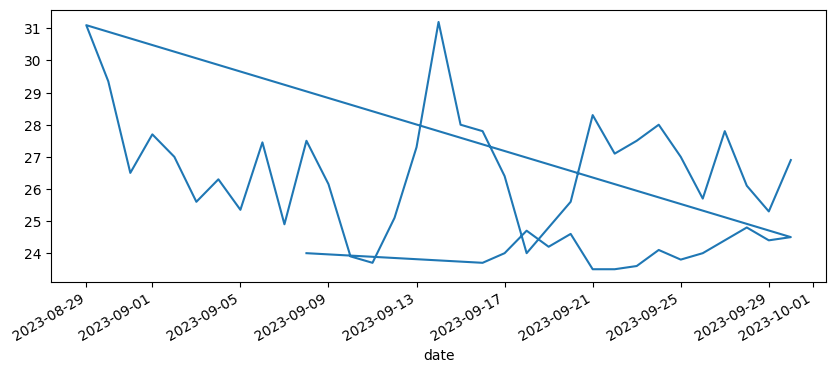

In [47]:
    # Quick plot
    ax = one_city.set_index('date')['temp_c'][-120:].plot(figsize=(10,4), label='History')
    fc_30['temp_fc'].plot(ax=ax, label='Forecast')
    ax.fill_between(fc_30.index, fc_30['lo'], fc_30['hi'], color='gray', alpha=0.2)
    plt.title(f"{city} — 30-day Temperature Forecast")
    plt.ylabel('°C'); plt.legend(); plt.tight_layout(); plt.show()